In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ma trận hiệp phương sai
Sigma = np.array([[1, 0], [0, 1]])

# Tạo dữ liệu
cluster1 = np.random.multivariate_normal([2, 2], Sigma, 50)
cluster2 = np.random.multivariate_normal([8, 3], Sigma, 20)
cluster3 = np.random.multivariate_normal([3, 6], Sigma, 1000)

# Gộp lại thành 1 tập dữ liệu
X = np.vstack((cluster1, cluster2, cluster3))

In [5]:
def initialize_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def compute_distances(X, centroids):
    return np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

def assign_clusters(distances):
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def kmeans(X, k=3, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        distances = compute_distances(X, centroids)
        labels = assign_clusters(distances)
        new_centroids = update_centroids(X, labels, k)
        
        if np.all(np.linalg.norm(centroids - new_centroids, axis=1) < tol):
            break
        centroids = new_centroids
    return centroids, labels


In [6]:
centroids, labels = kmeans(X, k=3)

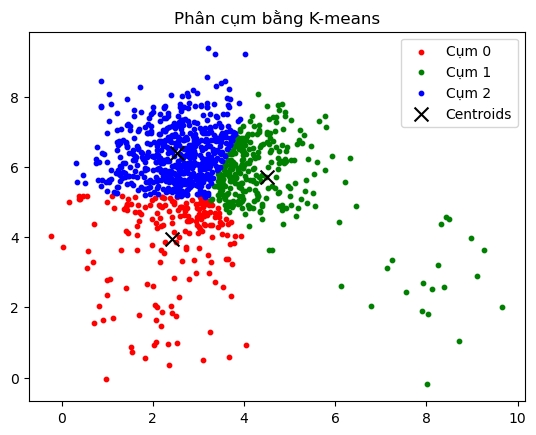

In [8]:
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=10, color=colors[i], label=f'Cụm {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
plt.legend()
plt.title("Phân cụm bằng K-means")
plt.show()